In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from typing import Final

CALIBRATION: Final[float] = 1.362 # [px/µm]

def binarize_image(image, threshold, show=False):

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    # Show the original and binarized images
    if show:
        cv2.imshow('Original Image', image)
        cv2.imshow('Binarized Image', binary_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return binary_image

def grayscale_image(image_path, show=False):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if show:
        cv2.imshow('Grayscale Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return image

def get_canny_edges(binary_image, show = False):
    edges = cv2.Canny(binary_image, 100, 200)  # Adjust the threshold values as needed
    if show:
        cv2.imshow('Detected edges', edges)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return edges

def rotate_image(image, angle, show = False):    
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    
    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    if show:
        # Show the original and rotated images
        cv2.imshow('Original Image', image)
        cv2.imshow('Rotated Image', rotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return rotated_image

In [9]:
image_path = 'Capilares/C4-diam-5x-1Light.jpg'  # Replace 'example_image.jpg' with the path to your image
threshold_value = 200  # Threshold value (0-255)
rotation_angle = -3.30  # Rotation angle in degrees
calibration = 1.362 # [px/µm]
#fimg = get_canny_edges(rotate_image(binarize_image(image_path, threshold_value), rotation_angle))
gray_img = rotate_image(grayscale_image(image_path),rotation_angle)

### Maquina de hacer chorizos

In [10]:
vertical_resolution = 2160 # la resolución vertical de nuestras imagenes - 500
rot_arr = -1*np.array([3.85,3.30,3.50,4.60,4.40]) # C1,...,C5
calibration = 1.362 # px/µm
threshold_value = 127

y_cut = 1000
yd_array = np.arange(y_cut,vertical_resolution-y_cut) #agarro un corte vertical
diam_array = np.empty(yd_array.size, dtype="object") #mi array de diametros va a tener a lo sumo yd_array.size valores

for n,alpha in enumerate(rot_arr):
    img_path = 'Capilares/C'+str(n+1)+'-diam-5x-1Light.jpg'
    #roto la imagen en escala de grises
    gray_img = rotate_image(
                grayscale_image(img_path),alpha
            )
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #por cada índice de mi corte vertical
    for i in yd_array:
        y = gray_img[i]
        x = np.arange(y.size)/calibration
        
        y_left = y[:y.size//2] #tomamos hasta la mitad no inclusive
        y_right = y[y.size//2:] #tomamos de la mitad
        x_left_peak = find_peaks(y_left, height=120, width=2)[0]
        x_right_peak = find_peaks(y_right, height=120, width=2)[0]
        
        if x_left_peak.size!=0 and x_right_peak.size!=0:
            xpeak_array = np.array([x_left_peak[0],
                                    x_right_peak[-1] + y.size//2]) # volvemos a ponerle la mitad del índice que le sacamos
            ypeak_array = np.array([y[xpeak_array[0]],
                                    y[xpeak_array[1]]])
            diam_array[i - y_cut] = (xpeak_array[1] - xpeak_array[0])/calibration #le restamos y_cut al índice para q empiece en 0

        ax1.plot(x,y,color='k')
        ax1.plot(xpeak_array/calibration,ypeak_array,'x',color='r')
    
    print("Radio de C"+str(n+1))
    print(np.average(diam_array)/2,np.std(diam_array)/2)
    
    ax2.plot(yd_array/calibration, diam_array, 'o', color='tab:blue')
    
    ax2.set_ylabel('diametro [µm]')
    ax2.set_xlabel('distancia-y [µm]')            
    ax1.set_xlabel('distancia-x [µm]')
    ax1.set_ylabel('grayscale (0-255)')
    fig.suptitle('C'+str(n+1))
    fig.tight_layout()

In [21]:
vertical_resolution

2160

## Filamentos

#### Es necesario preprocesar las imagenes

Radio de filamento


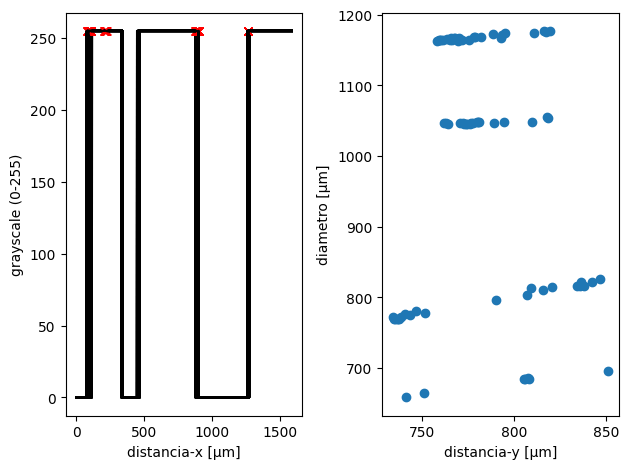

In [40]:
img_path = 'Filamentos/17-05-24/240514-_005.tiff'
gray_img = binarize_image(grayscale_image(img_path),120)
y_cut = 1000

vertical_resolution = gray_img.T[0].size

yd_array = np.arange(   y_cut  , vertical_resolution - y_cut) #agarro un corte vertical

diam_array = np.empty(  yd_array.size   , dtype="object") #mi array de diametros va a tener a lo sumo yd_array.size valores



fig, (ax1,ax2) = plt.subplots(1,2)

#por cada índice de mi corte vertical
for i in yd_array:
    y = gray_img.T[i]
    x = np.arange(y.size)/CALIBRATION
    
    y_left = y[:y.size//2] #tomamos hasta la mitad no inclusive
    y_right = y[y.size//2:] #tomamos de la mitad
    x_left_peak = find_peaks(y_left, height=250)[0]
    x_right_peak = find_peaks(y_right, height=250)[0]
    
    if x_left_peak.size!=0 and x_right_peak.size!=0:
        xpeak_array = np.array([x_left_peak[0],
                                x_right_peak[-1] + y.size//2]) # volvemos a ponerle la mitad del índice que le sacamos
        ypeak_array = np.array([y[xpeak_array[0]],
                                y[xpeak_array[1]]])
        diam_array[i - y_cut] = (xpeak_array[1] - xpeak_array[0])/CALIBRATION #le restamos y_cut al índice para q empiece en 0
        ax1.plot(xpeak_array/CALIBRATION,ypeak_array,'x',color='r')

    ax1.plot(x,y,color='k')

print("Radio de filamento")
#print(np.average(diam_array)/2,np.std(diam_array)/2)

ax2.plot(yd_array/CALIBRATION, diam_array, 'o', color='tab:blue')

ax2.set_ylabel('diametro [µm]')
ax2.set_xlabel('distancia-y [µm]')            
ax1.set_xlabel('distancia-x [µm]')
ax1.set_ylabel('grayscale (0-255)')
fig.tight_layout()